In [1]:
#倒入包
from math import log

In [2]:
def calcShannonEnt(datasets):
    numEntries = len(datasets)
    labelCounts = {}
    #统计每个分类出现的次数
    for featVec in datasets:
        currentLable = featVec[-1]
        if currentLable not in labelCounts.keys(): #对标签进行初始化
            labelCounts[currentLable] = 0
        labelCounts[currentLable] += 1
    shannonEnt = 0.0
    #计算香农熵
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt


In [3]:
def splitDataset(dataset,axis,value):
    #为什么还要传输value这个参数
    #当 axis=0 且 value=1 时，仅保留第 0 列值为 1 的样本，即第 0 列值为 0 的样本被剔除
    retDataset = []
    for featVec in dataset:
        #这里这个axis是特征的下标，value是特征值
        if featVec[axis] == value:
            #这里划分方便，后面分步骤进行计算相应的信息增益
            #比较有意思的切片操作
            reduceFeatVec = featVec[:axis] #前关后开 ，提取前面的数据集
            reduceFeatVec.extend(featVec[axis+1:]) #在提取前面的数据集上加上后面的数据集
            retDataset.append(reduceFeatVec)
    return retDataset
        

In [4]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
                [1, 1, 'yes'],
                [1, 0, 'no'],
                [0, 1, 'no'],
                [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    return dataSet,labels

In [ ]:
def chooseBestFeatureToSplt(dataSet):
    """
    选择最佳划分特征的索引。
    """
    dataNum = float(len(dataSet))
    #计算香农熵
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    #注意：这里的bestFeature是特征的下标
    bestFeature = -1
    featureNum = len(dataSet[0]) -1
    # print(f"DataSet: {dataSet}")
    # print(f"FeatureNum: {featureNum}")
        
    for i in range (featureNum):
        #提取第i个特征的所有取值
        featureList = [example[i] for example in dataSet]
        featureset = set(featureList)
        subEntropy = 0.0
        
        for value in featureset:
            subDataset = splitDataset(dataSet,i,value)
            prob = len(subDataset)/dataNum
            subEntropy +=prob*calcShannonEnt(subDataset) #找半天错在这
        infoGain = baseEntropy - subEntropy
        # print(f"Feature {i}: InfoGain={infoGain}")

        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            # print(f"Feature {i}: bestInfoGain={infoGain}")
            # print(i)
            bestFeature =i
            # print(bestFeature)
    # # 检查是否找到有效的划分特征
    # if bestFeature == -1:
    #     raise ValueError("Failed to find a valid feature for splitting.")
        # print(bestFeature)
    return bestFeature #找半天错在这，没有返回值，拼写错误

In [55]:
if __name__ == '__main__':
    dataSet,labels = createDataSet()
    print(calcShannonEnt(dataSet))
    myData,labels = createDataSet()
    myData,labels = createDataSet()
    print(splitDataset(myData,0,1))
    print(splitDataset(myData,0,0))
    
    print(chooseBestFeatureToSplt(myData))


0.9709505944546686
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]
DataSet: [[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
FeatureNum: 2
Feature 0: InfoGain=0.4199730940219749
Feature 0: bestInfoGain=0.4199730940219749
0
0
0
Feature 1: InfoGain=0.17095059445466854
0
0


In [56]:
def majorityCnt(classList):
    """
    统计类别列表中出现次数最多的类别。

    参数:
    classList: list, 类别标签列表

    返回:
    str, 出现次数最多的类别
    """
    classCounts = {} #类别计数
    for vote in classList:
        #这里段代码 加载有多少分类，然后再对分类进行统计计数
        if vote not in classCounts:
            classCounts[vote] = 0
        classCounts[vote] += 1
    sortedClassCount = sorted(classCounts.items(),key = lambda item:item[1],reverse= True) #对字典进行排序，按照value进行排序
        # 使用 classCounts.items() 转换 字典 为键值对 列表
        # 	•	使用 sorted() 函数对键值对列表进行排序：
        # •	key=lambda item: item[1]：按类别计数来进行排序
        # •	reverse=True：降序排序。
    print(classCounts)
    print(classCounts.items())
    for item in classCounts.items():
        print("item:", item, "item[1]:", item[1]) #打印元素个数
    print(sortedClassCount)
    return sortedClassCount[0][0]

In [23]:
majorityCnt(['yes','no','no'])

{'yes': 1, 'no': 2}
dict_items([('yes', 1), ('no', 2)])
item: ('yes', 1) item[1]: 1
item: ('no', 2) item[1]: 2
[('no', 2), ('yes', 1)]


'no'

In [57]:
#递归建树 <-这里说实话理解还不是很清楚，能感受到到(数据结构的用处）递归的精髓，但是还是有点模糊
def createTree(dataSet, labels):
    # 获取类别
    classList = [example[-1] for example in dataSet]
    # 1.类别一致无需划分，如果当前数据集中的所有类别相同，则无需继续划分，直接返回该类别。
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    
    # 2.没有特征可供划分，则选择一组结点中最多的类别作为该组的类别
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选取最佳划分属性
    bestFeature = chooseBestFeatureToSplt(dataSet)
    # labels 形如：labels = ['no surfacing', 'flippers']
    bestFeatureLabel = labels[bestFeature]

    myTree = {bestFeatureLabel: {}}
    # 已经划分过的特征不可再用，所以删除
    del (labels[bestFeature])

    featureValues = [example[bestFeature] for example in dataSet]
    uniqueVals = set(featureValues)

    # 按照最佳划分属性进行划分, 可能会划分为不止两个分支
    # 在各个分支的数据集分别调用递归函数
    for value in uniqueVals:
        #递归循环
        subLabels = labels[:]
        # splitDataSet：按照给定特征、给定特征值，构建新的数据集
        myTree[bestFeatureLabel][value] = createTree(
            splitDataset(dataSet, bestFeature, value), subLabels
        )

    return myTree

In [58]:
if __name__ == "__main__":
    # 运行主程序，将建立的决策树赋值给 myTree 并输出
    myData, initLabels = createDataSet()
    labels = initLabels[:]
    myTree = createTree(myData, labels)
    print(myTree)  # {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

DataSet: [[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
FeatureNum: 2
Feature 0: InfoGain=0.4199730940219749
Feature 0: bestInfoGain=0.4199730940219749
0
0
0
Feature 1: InfoGain=0.17095059445466854
0
DataSet: [[1, 'yes'], [1, 'yes'], [0, 'no']]
FeatureNum: 1
Feature 0: InfoGain=0.9182958340544896
Feature 0: bestInfoGain=0.9182958340544896
0
0
0
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [59]:
'''
构建注解树
'''

# 导入必要模块
import matplotlib.pyplot as plt

# 设置节点和箭头样式
decisionNode = {'boxstyle': 'sawtooth', 'fc': '0.8'}  # 决策节点样式
leafNode = {'boxstyle': 'round4', 'fc': '0.8'}  # 叶节点样式
arrow_args = {'arrowstyle': '<-'}  # 箭头样式

# 绘制决策树节点并添加注释
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    """
    绘制一个节点并添加注释箭头。
    
    参数:
    nodeTxt: str, 节点文本内容
    centerPt: tuple, 当前节点的坐标 (x, y)
    parentPt: tuple, 父节点的坐标 (x, y)
    nodeType: dict, 节点样式（可以是 decisionNode 或 leafNode）
    """
    createPlot.ax1.annotate(nodeTxt, 
                            xy=parentPt, xycoords='axes fraction',  # 父节点位置
                            xytext=centerPt, textcoords='axes fraction',  # 当前节点位置
                            va="center", ha="center",  # 垂直和水平居中
                            bbox=nodeType,  # 节点样式
                            arrowprops=arrow_args)  # 箭头样式

Matplotlib is building the font cache; this may take a moment.


In [69]:
# 计算决策树的叶子结点数
def getNumLeaves(myTree):
    """
    递归计算决策树的叶子结点数。

    参数:
    myTree: dict, 决策树的嵌套字典表示

    返回:
    int, 决策树中的叶子结点总数
    """
    numLeaves = 0  # 初始化叶子结点计数
    firstStr = list(myTree.keys())[0]  # 获取决策树的第一个分支特征
    secondDict = myTree[firstStr]  # 获取第一个分支的子树或叶子

    # 遍历分支
    for key in secondDict.keys():
        # 如果子节点是字典类型，则递归计算其叶子结点数
        if isinstance(secondDict[key], dict):
            numLeaves += getNumLeaves(secondDict[key])
        else:
            # 如果子节点不是字典，则是叶子结点
            numLeaves += 1

    return numLeaves

In [70]:
# 计算决策树的深度 (此处的深度不包括根结点)
def getTreeDepth(myTree):
    """
    递归计算决策树的深度。

    参数:
    myTree: dict, 决策树的嵌套字典表示

    返回:
    int, 决策树的深度（不包括根结点）
    """
    maxDepth = 0  # 初始化最大深度
    firstStr = list(myTree.keys())[0]  # 获取决策树的第一个分支特征
    secondDict = myTree[firstStr]  # 获取第一个分支的子树或叶子

    # 遍历分支
    for key in secondDict.keys():
        # 如果子节点是字典类型，则递归计算其深度
        if isinstance(secondDict[key], dict):
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            # 如果子节点不是字典，则深度为1
            thisDepth = 1

        # 更新最大深度
        if thisDepth > maxDepth:
            maxDepth = thisDepth

    return maxDepth

In [71]:
'''
添加箭头旁边的文字
在父子结点间填充文本信息，比如箭头旁边的注释 0, 1, 2 之类的。

参数:
- parentPt: 父结点位置
- cntrPt: 子结点位置
- txtString: 箭头上的标注内容
'''

# 计算路径
def plotMidText(cntrPt, parentPt, txtString):
    """
    在父子结点中间添加标注文字。

    参数:
    cntrPt: tuple, 子结点的位置 (x, y)
    parentPt: tuple, 父结点的位置 (x, y)
    txtString: str, 标注文字
    """
    # 计算文字的中间位置
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]

    # 在图中添加文字
    createPlot.ax1.text(xMid, yMid, txtString)

In [72]:
def plotTree(myTree, parentPt, nodeTxt):
    """
    绘制决策树的主函数。

    参数:
    myTree: dict, 决策树的嵌套字典表示
    parentPt: tuple, 父结点的位置 (x, y)
    nodeTxt: str, 当前结点的文字内容
    """
    # 计算当前树的宽和高
    numLeaves = getNumLeaves(myTree)  # 获取树的叶子结点数
    depth = getTreeDepth(myTree)  # 获取树的深度
    firstStr = list(myTree.keys())[0]  # 获取当前树的第一个关键字（根节点）

    # 当前结点位置在其所有叶子结点正中间
    cntrPt = (plotTree.xOff + (1.0 + float(numLeaves)) / 2.0 / plotTree.totalW, plotTree.yOff)

    # 添加箭头和结点（如果是根结点，则没有箭头）
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)

    # 获取子树
    secondDict = myTree[firstStr]

    # 进入子树时，深度增加（y 坐标降低一个单位）
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD

    for key in secondDict.keys():
        if isinstance(secondDict[key], dict):
            # 如果存在子树，则递归绘制子树
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 如果是叶子结点，x 坐标向右移动
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            # 绘制叶子结点
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 添加箭头旁的文字
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))

    # 子树绘制完毕后，返回上一层（y 坐标回升）
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

In [73]:
'''
全局变量说明：
- plotTree.totalW: 存储树的宽度
- plotTree.totalD: 存储树的高度
- plotTree.xOff: 用于追踪已经绘制的结点位置的 x 偏移量
- plotTree.yOff: 用于追踪已经绘制的结点位置的 y 偏移量
'''

# 设置图片和树的样式
def createPlot(inTree):
    """
    创建决策树的绘图框架并初始化全局变量。

    参数:
    inTree: dict, 决策树的嵌套字典表示
    """
    # 创建绘图窗口，设置背景为白色
    fig = plt.figure(1, facecolor='white')
    fig.clf()  # 清除当前图像

    # 设置坐标轴属性，隐藏刻度
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)  # 无边框绘图

    # 初始化全局变量
    plotTree.totalW = float(getNumLeaves(inTree))  # 树的总宽度
    plotTree.totalD = float(getTreeDepth(inTree))  # 树的总深度
    plotTree.xOff = -0.5 / plotTree.totalW  # 初始 x 偏移量
    plotTree.yOff = 1.0  # 初始 y 偏移量

    # 调用绘制函数，从根节点开始绘制树
    plotTree(inTree, (0.5, 1.0), '')

    # 显示绘图结果
    plt.show()

In [74]:
# 检测树的每个路径并返回
def retrieveTree(i):
    """
    返回预定义的决策树。

    参数:
    i: int, 索引值，指定要返回的决策树

    返回:
    dict, 决策树的嵌套字典表示
    """
    listOfTrees = [
        {
            'no surfacing': {
                0: 'no',
                1: {
                    'flippers': {
                        0: 'no',
                        1: 'yes'
                    }
                }
            }
        },
        {
            'no surfacing': {
                0: 'no',
                1: {
                    'flippers': {
                        0: {
                            'head': {
                                0: 'no',
                                1: 'yes'
                            }
                        },
                        1: 'no'
                    }
                }
            }
        },
        {
            'no surfacing': {
                0: {
                    'flippers': {
                        0: 'no',
                        1: 'yes'
                    }
                },
                1: {
                    'flippers': {
                        0: 'no',
                        1: 'yes'
                    }
                },
                2: {
                    'flippers': {
                        0: 'no',
                        1: 'yes'
                    }
                }
            }
        },
        {
            'no surfacing': {
                0: 'no',
                1: {
                    'flippers': {
                        0: 'no',
                        1: 'yes'
                    }
                },
                3: 'maybe'
            }
        }
    ]
    return listOfTrees[i]

树的叶节点有 3 个，深度为 2


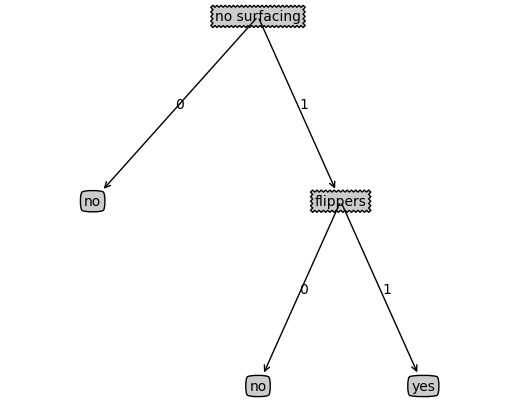

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}


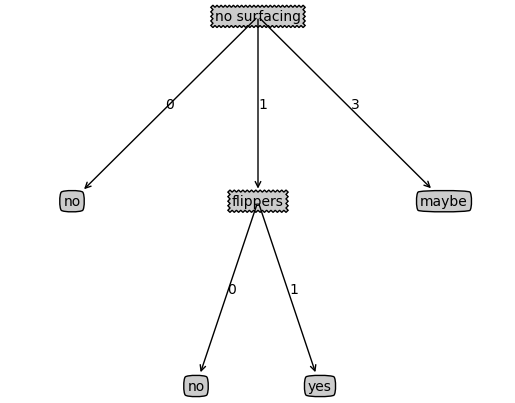

In [75]:
if __name__ == "__main__":
    # 计算预定义的树结构
    myTree = retrieveTree(0)
    numLeaves = getNumLeaves(myTree)  # 获取叶节点数
    treeDepth = getTreeDepth(myTree)  # 获取树的深度
    print("树的叶节点有", numLeaves, "个，深度为", treeDepth)

    # 绘制决策树
    myTree = retrieveTree(0)
    createPlot(myTree)  # 绘制初始决策树

    # 修改决策树结构
    myTree['no surfacing'][3] = 'maybe'  # 添加新的分支
    print(myTree)  # 打印修改后的树结构

    # 绘制修改后的决策树
    createPlot(myTree)

In [77]:
# from test1 import createDataSet, createTree

def classify(inputTree, featureLabels, testVec):
    """
    使用决策树对测试向量进行分类。

    参数:
    inputTree: dict, 已训练好的决策树
    featureLabels: list, 特征标签的顺序
    testVec: list, 待分类的数据向量

    返回:
    classLabel: str, 分类结果
    """
    # 取第一个分类特征（根结点）
    firstStr = list(inputTree.keys())[0]

    # 取根结点的子树集
    secondDict = inputTree[firstStr]

    # 第一个分类特征的索引
    featureIndex = featureLabels.index(firstStr)

    # 遍历子结点，找到对应特征值
    for key in secondDict.keys():
        # 如果测试向量的特征值与当前结点匹配
        if testVec[featureIndex] == key:
            # 如果子节点是子树，则递归分类
            if isinstance(secondDict[key], dict):
                classLabel = classify(secondDict[key], featureLabels, testVec)
            else:
                # 如果子节点是叶节点，则返回标签
                classLabel = secondDict[key]
    return classLabel

In [ ]:
# '''
# 构造决策树比较耗时，这里提供存储预训练好的决策树的方法。
# '''

# from test1 import createDataSet, createTree
# from test2 import createPlot

'''
用 pickle 模块存储决策树

pickle.dump(obj, file, [, protocol]):
- 序列化对象，将对象 obj 保存到文件 file 中。
- 参数 protocol 是序列化模式：
  - 默认是 0（ASCII 协议，表示以文本的形式进行序列化）。
  - protocol 的值还可以是 1 和 2：
    - 1：老式的二进制协议。
    - 2：新二进制协议（二进制的形式进行序列化）。
- file 表示保存的目标，必须有 write() 接口，可以是：
  - 一个以 'w' 打开的文件。
  - 一个 StringIO 对象。
  - 任何实现 write() 接口的对象。

pickle.load(file):
- 反序列化对象，将文件中的数据解析为一个 Python 对象。
- file 必须有 read() 和 readline() 接口。
'''

# 存储决策树
def storeTree(inputTree, filename):
    """
    将决策树存储到文件中。

    参数:
    inputTree: dict, 决策树的嵌套字典表示
    filename: str, 保存的文件名
    """
    import pickle
    with open(filename, 'wb') as fw:  # 以二进制写模式打开文件
        pickle.dump(inputTree, fw)  # 序列化对象并保存到文件

In [79]:
def grabTree(filename):
    """
    从文件中加载存储的决策树。

    参数:
    filename: str, 文件名，包含序列化的决策树

    返回:
    dict, 反序列化后的决策树
    """
    import pickle
    with open(filename, 'rb') as fr:  # 以二进制读模式打开文件
        return pickle.load(fr)  # 对象反序列化


# 运行主程序
if __name__ == "__main__":
    # 创建数据集和初始特征标签
    myData, initLabels = createDataSet()
    print(myData)  # 输出: [[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

    # 构建决策树
    labels = initLabels[:]
    myTree = createTree(myData, labels)
    print(myTree)  # 输出: {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

    # 存储决策树
    storeTree(myTree, 'classifierStorage.txt')

    # 加载并打印决策树
    print(grabTree('classifierStorage.txt'))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
DataSet: [[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
FeatureNum: 2
Feature 0: InfoGain=0.4199730940219749
Feature 0: bestInfoGain=0.4199730940219749
0
0
0
Feature 1: InfoGain=0.17095059445466854
0
DataSet: [[1, 'yes'], [1, 'yes'], [0, 'no']]
FeatureNum: 1
Feature 0: InfoGain=0.9182958340544896
Feature 0: bestInfoGain=0.9182958340544896
0
0
0
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
